# Visualization of overlapping genes in shap top 100

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns

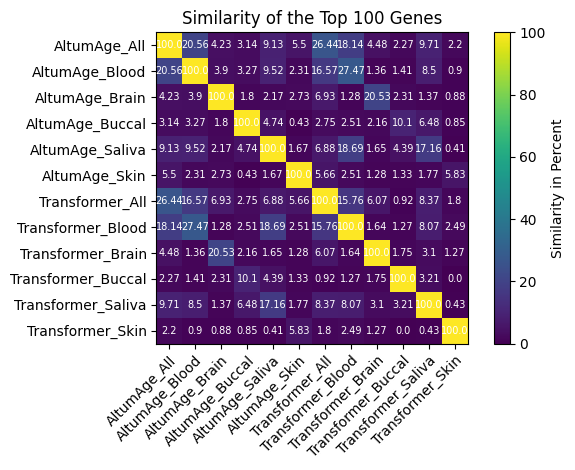

In [ ]:
data_perc=pd.read_csv('statistics_shap.csv')
y=data_perc.iloc[:,0]
x=data_perc.columns
x=x[1:]
data_perc=data_perc.drop(data_perc.columns[0], axis=1)
data_perc=data_perc.values

fig, ax = plt.subplots()
im = ax.imshow(data_perc)


ax.set_xticks(range(len(x)), labels=x,
              rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(y)), labels=y)

#loop over genes
for i in range(len(y)):
    for j in range(len(x)):
        text = ax.text(j, i, data_perc[i, j],
                       ha="center", va="center", color="w", size=7)

ax.set_title("Similarity of the Top 100 Genes")
fig.tight_layout()
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Similarity in Percent')
plt.savefig('genes_heatmap.jpg', transparent=True)
plt.show()



# Visualization of top 20 genes over all models

AltumAge All - 21 unique genes
AltumAge Blood - 21 unique genes
AltumAge Saliva - 21 unique genes
Transformer All - 22 unique genes
Transformer Blood - 21 unique genes
Transformer Saliva - 25 unique genes


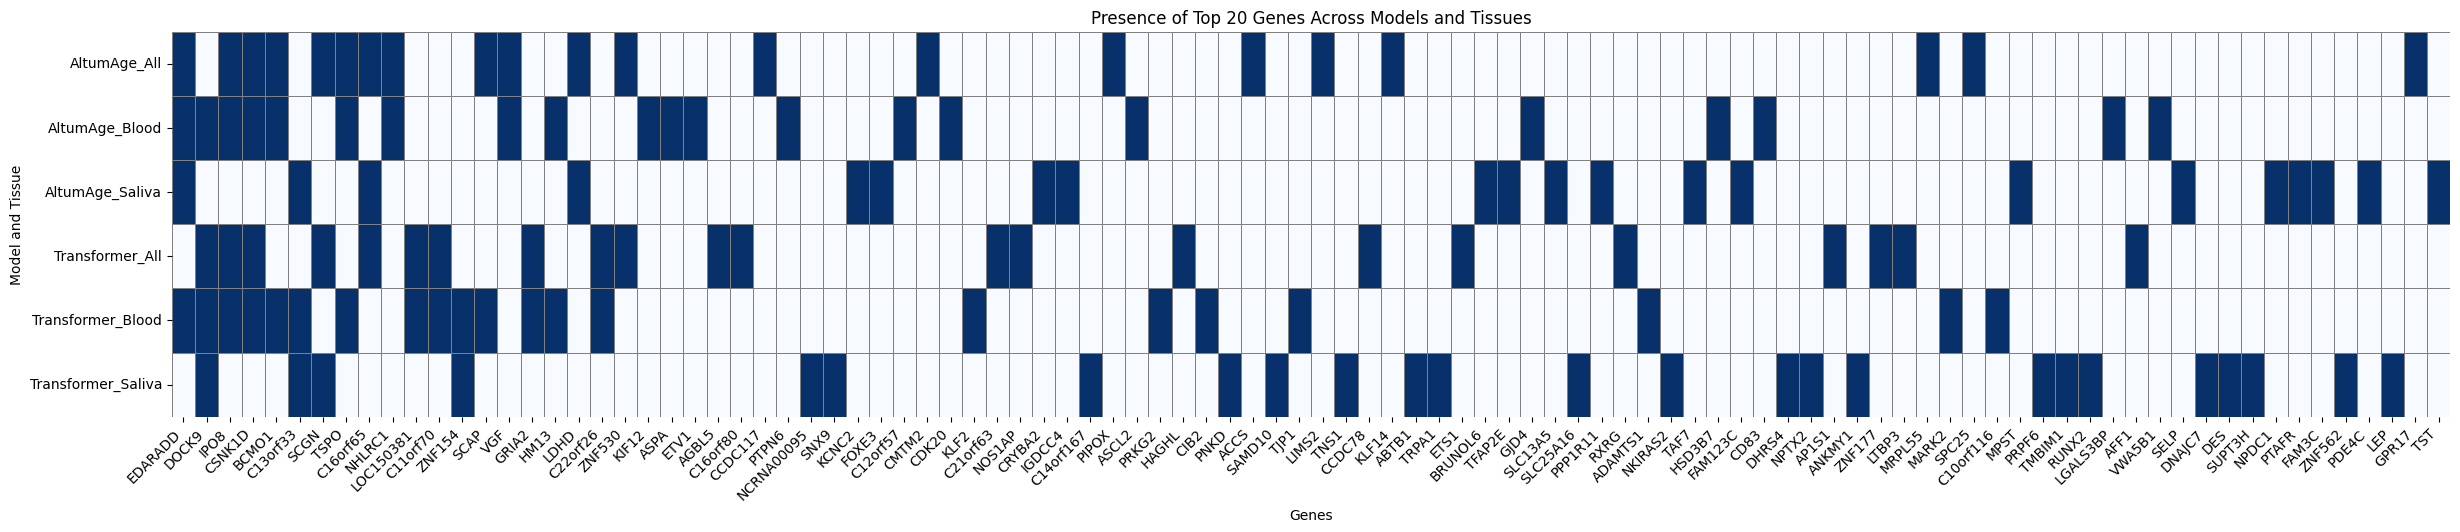

In [3]:
models = ['AltumAge', 'Transformer']
tissue_types = ['All','Blood','Saliva']

shap_list = {}

#importing all gene importance data
for model in models:
    shap_list[model] = {}
    for tissue in tissue_types:
        values = pd.read_csv(f'mean_shap_per_gene_{model}_80:20_{tissue}.csv')
        gene_series = values['UCSC_RefGene_Name'].astype(str).head(20) 
        
        # Split gene names by ;
        genes_split = []
        for item in gene_series:
            genes_split.extend(item.split(";"))
        
        # Remove duplicates by converting to a set and back to list
        unique_genes = list(set(genes_split))
        
        shap_list[model][tissue] = unique_genes
        print(f"{model} {tissue} - {len(unique_genes)} unique genes")


shap_list=dict(shap_list)
model_tissue_labels = []
for model, tissue_dict in shap_list.items():
    for tissue in tissue_dict.keys():
        model_tissue_labels.append(f"{model}_{tissue}")

# Flatten genes over all model-tissue pairs for row labels
all_genes = list(set(
    gene
    for tissue_dict in shap_list.values()
    for genes in tissue_dict.values()
    for gene in genes
))

# Create empty dataframe with model_tissue columns
presence_matrix = pd.DataFrame(0, index=all_genes, columns=model_tissue_labels)

# Fill presence matrix
for model, tissue_dict in shap_list.items():
    for tissue, genes in tissue_dict.items():
        presence_matrix.loc[genes, f"{model}_{tissue}"] = 1

# Sort genes by presence count (optional)
presence_matrix = presence_matrix.loc[presence_matrix.sum(axis=1).sort_values(ascending=False).index]
presence_matrix = presence_matrix.loc[presence_matrix.sum(axis=1).sort_values(ascending=False).index]
# Plot heatmap with combined model_tissue labels
plt.figure(figsize=( len(all_genes) * 0.3,5))
sns.heatmap(presence_matrix.T, cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')

plt.title('Presence of Top 20 Genes Across Models and Tissues')
plt.xlabel('Genes')
plt.ylabel('Model and Tissue')
plt.yticks(rotation=0) 
plt.xticks(rotation=45, ha='right')
plt.savefig('genes_table.jpg', transparent=True)
plt.show()